In [2]:
import numpy as np
import pandas as pd

data = pd.read_excel('2017_113_people.xlsx')
cleandata = data.iloc[:, [9,21,22,23,24]]
mapping = {'AP指数' : 'AP',  'CDS评分' : 'CDS',  '纤维化分级' : 'result' }
cleandata.rename(columns=mapping, inplace=True)
cleandata.tail()

/Users/jack/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,result,APRI,FIB4,AP,CDS
97,1,0.006250,124.800000,6,6
98,1,0.005288,136.442308,2,5
99,3,0.008251,227.342697,4,5
100,1,0.003869,100.982143,5,5
101,1,0.000000,0.000000,3,3


In [3]:
cleandata.groupby('result').mean()   # 置信区间为80%  50%  30%的范围 

,APRI,FIB4,AP,CDS
result,,,,
0,0.007712,761.266342,4.428571,4.857143
1,0.004929,273.356234,3.948276,5.034483
2,0.019964,2907.313099,5.176471,5.352941
3,0.013577,469.660899,6.400000,5.900000
4,0.068118,9252.502287,5.200000,5.500000


In [10]:
%matplotlib notebook
for name, group in cleandata.groupby('result'):
    print(name , len(group), type(group['APRI'].values))

0 7 <class 'numpy.ndarray'>
1 58 <class 'numpy.ndarray'>
2 17 <class 'numpy.ndarray'>
3 10 <class 'numpy.ndarray'>
4 10 <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


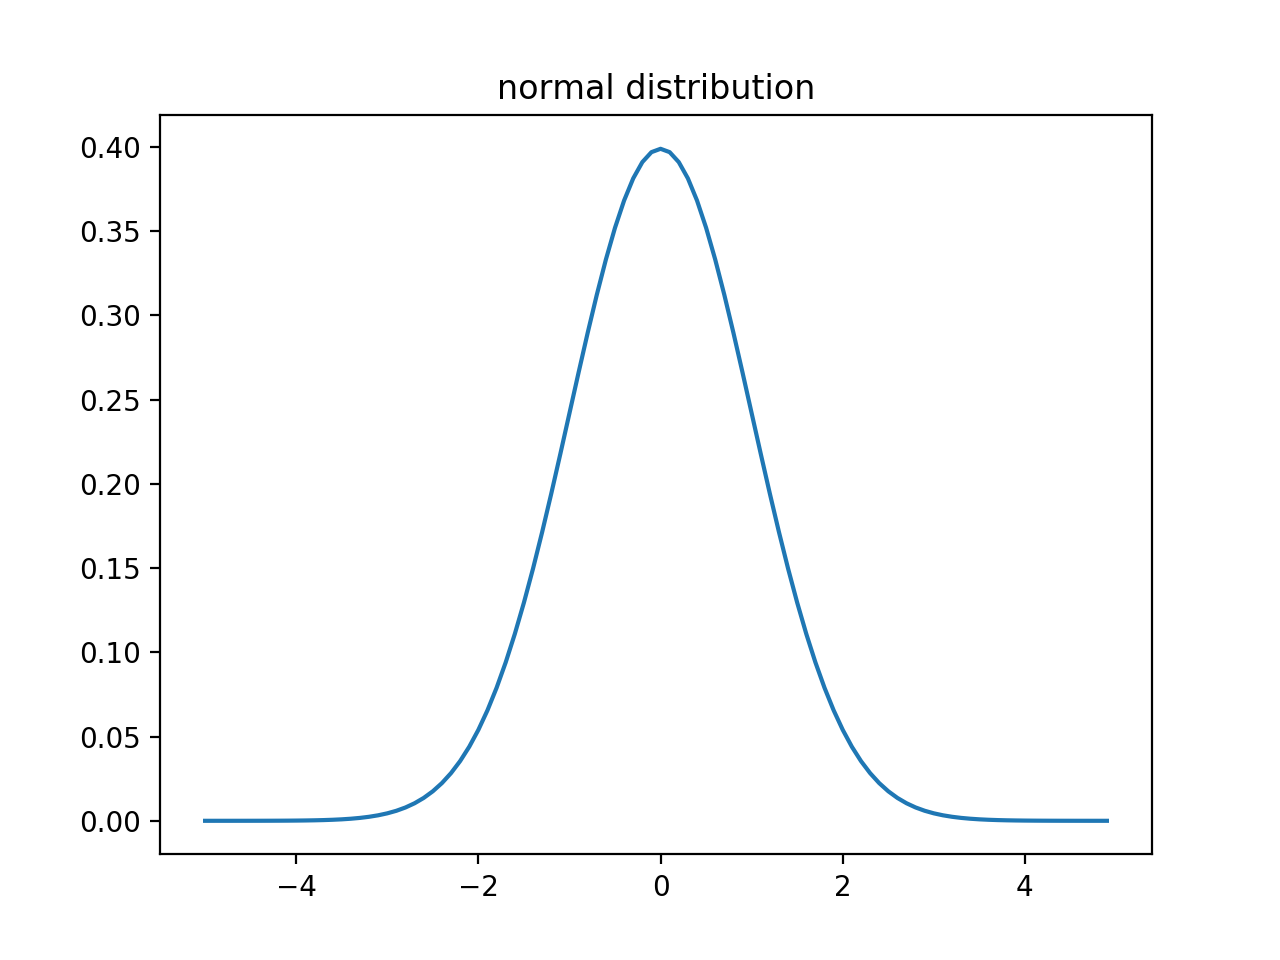

In [7]:
# groupby后求正态分布的范围
'''
https://www.jianshu.com/p/6cfce4cc2f7f
正态分布  期望和标准差

又牵涉到中心极限定理和大数定理
'''
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib notebook
x = np.arange(-5, 5, 0.1)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.title('normal distribution')
plt.show()

In [41]:
cleandata.groupby('result')['APRI']

In [73]:
#array = cleandata.loc[1].values
array = cleandata[cleandata['result'] == 1]['APRI'].values
len(array)

58

In [ ]:
# 描述  已知同类别的APRI数据，想知道这个分布是咋样的，能否转化成正态分布那样，然后找到置信区间，转化是否合理？  
#  暂时没有好的解决方案，还需要学习
# todo: 把统计学习方法 和  赤裸裸的统计学 给搞定再说 